# 데이터셋
https://www.kaggle.com/competitions/playground-series-s3e16/overview, 
평가지표 MAE (Mean Absolute Error)

# 팀원 : 202004225 이성민, 202004246 홍준표

# 1. 개요

해당 데이터는 게의 나이을 예측하는 문제로 게 양식업자는 게의 나이를 알면 포획시기를 결정하는데 큰 도움이 됩니다.

특정 나이가 지나게 되면 게의 성장률이 낮아지기 때문에 비용절감 및 수익을 올리기고 게농장을 효율적으로 풀가동하기 위해서는 게의 나이를 알고 적절할 때 포획하는 것이 굉장히 중요합니다.

# 2. 데이터 수집

해당 데이터셋은 기존 게 나이를 예측하는 데이터셋 (https://www.kaggle.com/datasets/sidhus/crab-age-prediction) 을 가지고 교육된 딥러닝 모델에서 생성 되었습니다.

이 데이터셋은 게의 길이, 지름, 무게 등의 성장에 관한 데이터와 성별, 나이를 주고 테스트셋의 게의 나이를 예측하는 문제입니다.

# 3. 데이터 전처리

In [100]:
# 필요한 라이브러리 및 파일을 불러옵니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

In [101]:
# 데이터셋을 확인해줍니다.

df.head(3)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.275,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.375,24.777463,11.339800,5.556502,6.662133,9


info로 데이터셋 확인결과 Null값은 보이지 않고 범주형 변수도 성별밖에 없는것으로 확인됩니다

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


다른것들을 확인해보기전에 object타입인 성별을 수치형으로 변환해보겠습니다.

여기서는 원 핫 인코딩이 아닌 사이킷런에 있는 LabelEncoder을 이용해서 변환해보겠습니다

LabelEncoder는 범주형 변수를 수치형으로 변환시켜주는데 예를들어 사과 배 수박이 있다면 사과는 0으로 배는 1로 수박은 2로 변환시켜줍니다.

어떤변수가 무슨 숫자로 변하였는지는 classes_ 속성에 저장되어있으니 언제든지 확인이 가능합니다.

이를 되돌리고 싶을때는 inverse_transform을 사용하시면 됩니다.

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# F는 0, I는 1, M은 2로 각각 변환됨
print(le.classes_)

# df['Sex'] = le.inverse_transform(df['Sex'])  <~~  원래대로 되돌리는 코드

['F' 'I' 'M']


잘 변환된것을 확인하기위해 head로 확인해봅니다.

In [104]:
df.head(3)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1,1.5250,1.1750,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,1,1.1000,0.8250,0.275,10.418441,4.521745,2.324659,3.401940,8
2,2,2,1.3875,1.1125,0.375,24.777463,11.339800,5.556502,6.662133,9


이어서 기술통계도 확인해보겠습니다.

Height의 최소값이 0으로 나와있는데 키가 0인 꽃게는 있을수가 없다고 판단하여 Height가 0인 값은 이상치로 취급하고 삭제하겠습니다

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74051.0,37025.000000,21376.826729,0.000000,18512.500000,37025.000000,55537.500000,74050.000000
Sex,74051.0,1.055016,0.820647,0.000000,0.000000,1.000000,2.000000,2.000000
Length,74051.0,1.317460,0.287757,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74051.0,1.024496,0.237396,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74051.0,0.348089,0.092034,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,74051.0,23.385217,12.648153,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74051.0,10.104270,5.618025,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74051.0,5.058386,2.792729,0.042524,2.863300,4.989512,6.988152,21.545620
Shell Weight,74051.0,6.723870,3.584372,0.042524,3.968930,6.931453,9.071840,28.491248
Age,74051.0,9.967806,3.175189,1.000000,8.000000,10.000000,11.000000,29.000000


In [106]:
# 24개가 있는것을 확인할 수 있습니다.

(df['Height'] == 0).value_counts()

False    74027
True        24
Name: Height, dtype: int64

In [107]:
idx_list = np.where(df['Height'] == 0)
df_del = df.drop(index = [idx_list[0][i] for i in range(len(idx_list[0]))], axis = 0)
(df_del['Height'] == 0).sum()

0

시각화를 하기전에 필요없는 변수인 id를 삭제해주겠습니다.

In [108]:
df_del.drop('id', axis = 1, inplace = True)

pairplot으로 각각의 변수들을 시각화 해보았습니다.

Length와 Diameter는 서로 강한 상관관계를 보이고 있지만

Height는 두 변수와 그리 좋은 상관관계를 보이고있지 않습니다.

또한 Length와 Diameter변수는 오른쪽에 좀 더 기운 분포를 보여주고 있지만

Height는 왼쪽에 치우친 분포를 띄고있습니다.

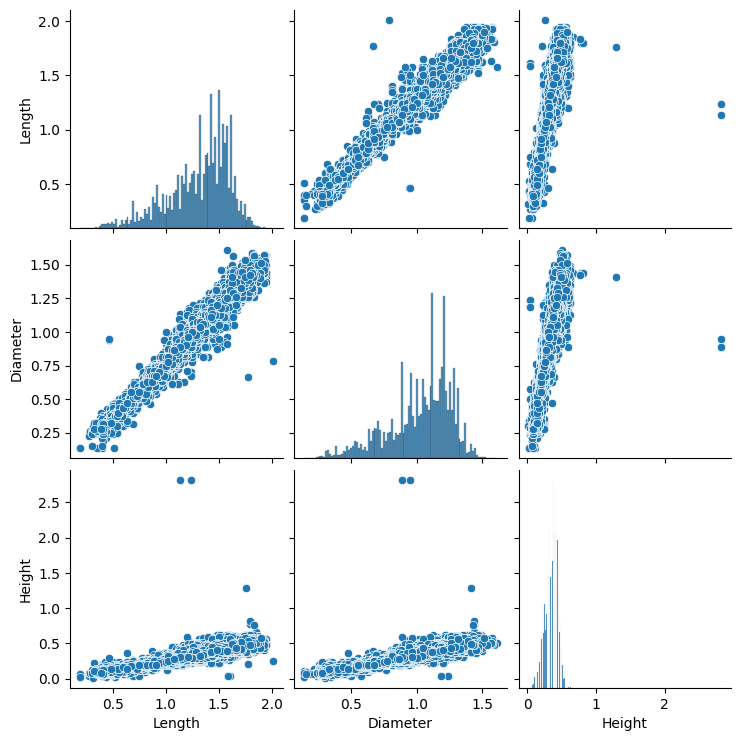

In [109]:
sns.pairplot(df_del[['Length', 'Diameter', 'Height']])

마찬가지로 Weight, Shucked Weight, Viscera Weight, Shell Weight 4개의 변수를 시각화 해보았습니다.

서로서로 강한 상관관계를 가지고 있는것으로 확인됩니다.

각 변수들은 모두 왼쪽에 치우친 모습을 보여주고 있습니다.

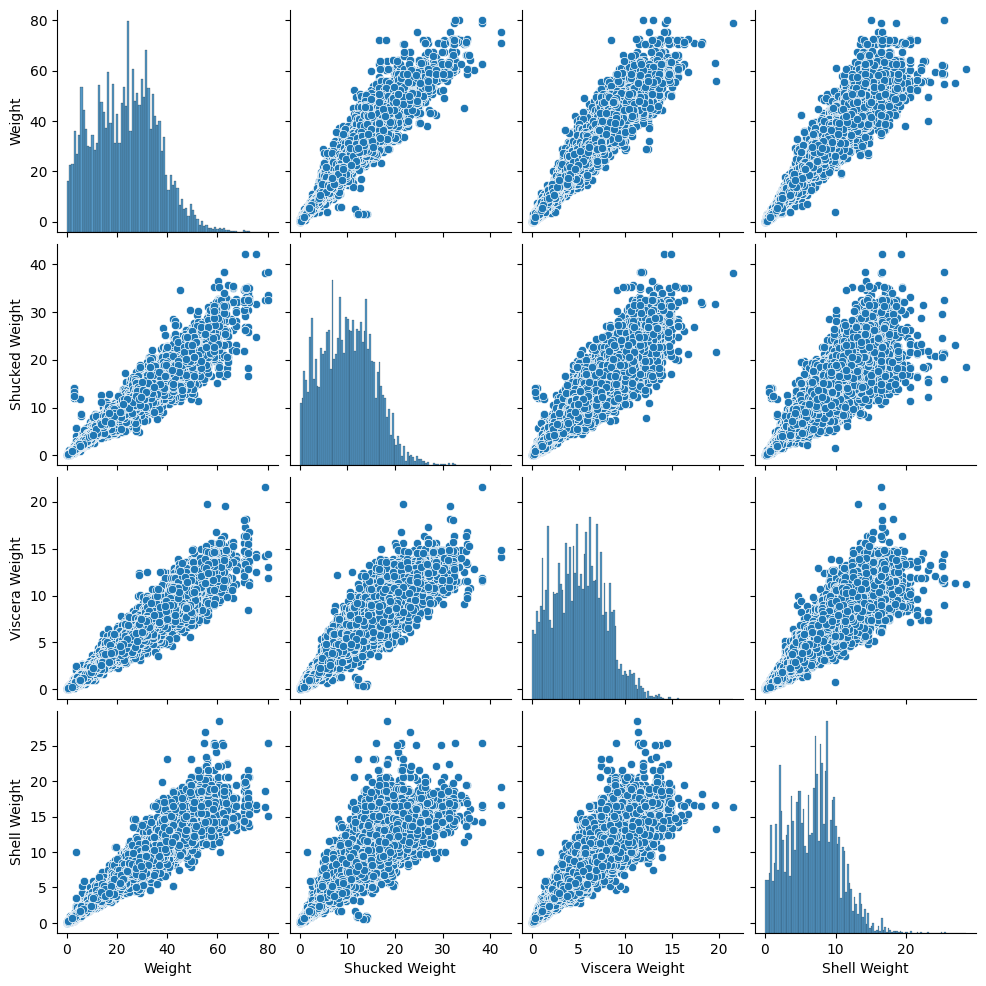

In [110]:
sns.pairplot(df_del[['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']])

다음으로 나이의 분포를 보기위해 히스토그램을 그려보았습니다.

주로 10살 전후로 많이 분포되있는것으로 확인됩니다.

<AxesSubplot: ylabel='Frequency'>

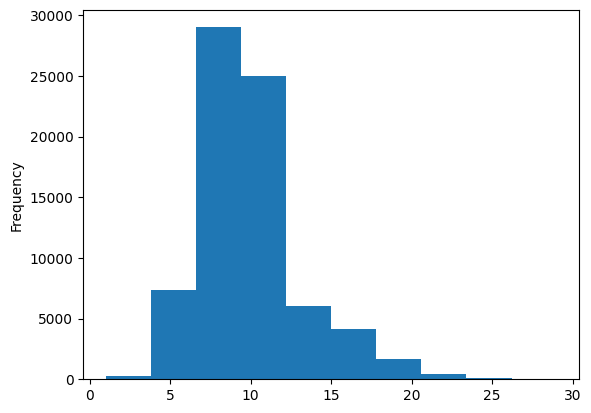

In [111]:
df_del['Age'].plot(kind = 'hist')

나이와 무게의 관계를 보기위해 막대그래프를 그려보았습니다.

11살까지는 급격하게 성장하나 그 이후로는 성장이 점점 더뎌지게 되는것을 보여줍니다.

<AxesSubplot: xlabel='Age', ylabel='Weight'>

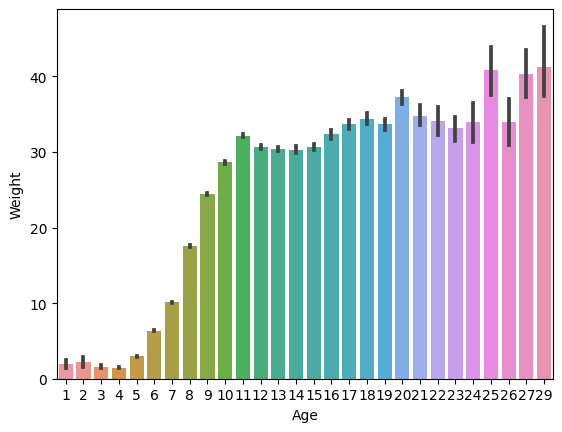

In [112]:
sns.barplot(x = 'Age', y = 'Weight', data = df_del)

마찬가지로 나이와 길이의 관계를 시각화해보았습니다.

무게 변수들과 같이 11살까지는 좋은 성장을 보여주나 그 이후로부턴 거의 성장이 미미한것을 볼 수 있습니다.

<AxesSubplot: xlabel='Age', ylabel='Length'>

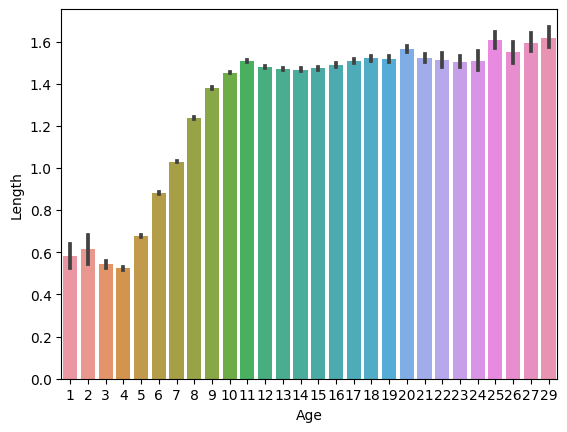

In [113]:
sns.barplot(x = 'Age', y = 'Length', data = df_del)

In [114]:
df_corr = df_del.corr()

히트맵을 확인해본 결과 성별 변수는 타 변수들과 좋은 상관관계를 보여주지 못하였고

타겟값인 나이 변수는 성별을 제외한 모든 변수와 0.5 ~ 0.6 정도되는 상관관계를 보여주었습니다.

이로보아 성별을 제외한 변수를 없애고 머신러닝을 하는 것은 사용할 데이터를 줄이고 성능을 저하시킨다고 예상이 되며

성능을 높이기 위해서는 기존 변수들을 가지고 새로운 변수를 창출해 이용하는 것이 의미 있다고 생각됩니다.

<AxesSubplot: >

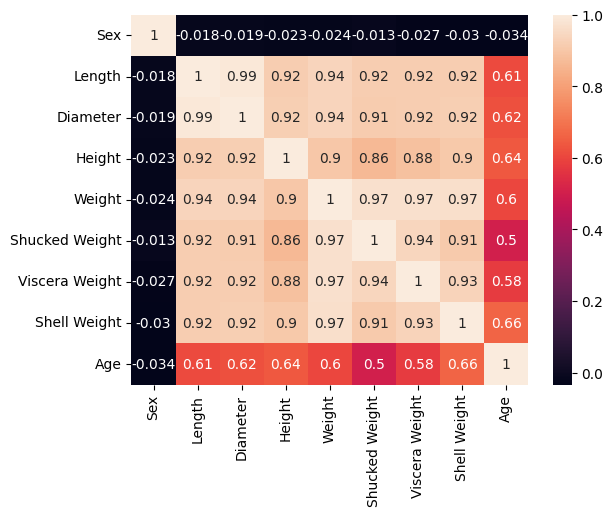

In [116]:
sns.heatmap(df_corr, annot = True)